In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("input/Churn_Modelling.xlsx")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Cleaning
1. 確定哪些資料是無意義 (unique = 1)
2. 清除不必要資料 "RowNumber" , "CustomerId" , "Surname"
3. 將物件項目 (object) 轉換 encode to (int)

In [2]:
# checking the percentage unique 
# All data are Uniques ->> 1     # Less Unique ->> 0
for col in data.columns :
    print(" col_name : " , col , " unique percentage : " , len(data[col].unique())/len(data))

 col_name :  RowNumber  unique percentage :  1.0
 col_name :  CustomerId  unique percentage :  1.0
 col_name :  Surname  unique percentage :  0.2932
 col_name :  CreditScore  unique percentage :  0.046
 col_name :  Geography  unique percentage :  0.0003
 col_name :  Gender  unique percentage :  0.0002
 col_name :  Age  unique percentage :  0.007
 col_name :  Tenure  unique percentage :  0.0011
 col_name :  Balance  unique percentage :  0.6382
 col_name :  NumOfProducts  unique percentage :  0.0004
 col_name :  HasCrCard  unique percentage :  0.0002
 col_name :  IsActiveMember  unique percentage :  0.0002
 col_name :  EstimatedSalary  unique percentage :  0.9999
 col_name :  Exited  unique percentage :  0.0002


In [3]:
# deleting RowNumber , CustomerId and Surname 
data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Label encode the Object Datatypes 
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':      #Geography #Gender 
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# one hot encode geography  (optional) 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()
#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]
data = data.drop(["Geography"] , axis = 1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [6]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [7]:
# Feature and Target vector
X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [8]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [9]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

## standardized (mean should be 1)

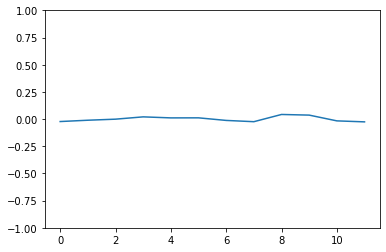

In [10]:
plt.ylim(-1,1)
means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

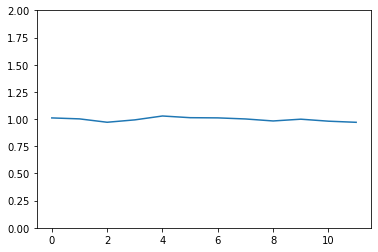

In [11]:
# Check variances 
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

## LogisticRegression
Coefficients(係數) and Intercept(截距) like Linear Regression

In [12]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(Xtrain , Ytrain)
model.score(Xtest , Ytest)

0.8215

In [13]:
model.coef_

array([[-0.03444651, -0.25435422,  0.75093096, -0.05445845,  0.20181171,
        -0.06473687, -0.04270295, -0.53682421,  0.03456902, -0.11088871,
        -0.08503169,  0.21209781]])

In [14]:
model.intercept_

array([-1.63966082])

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [16]:
# Sigmoid(W.dot(X) + c)
sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_)

array([0.09872623])

In [17]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_))

array([0.])

In [18]:
model.predict(Xtest[10,:].reshape(1,-1))

array([0], dtype=uint8)

## Recursive Feature Elimination (RFECV) 遞歸特徵消除：特徵擷取的一種方法

通過交叉驗證來找到最優的特徵數量。如果減少特徵會造成性能損失，那麼將不會去除任何特徵。這個方法用以選取單模型特徵相當不錯，但是有兩個缺陷，一，計算量大。二，隨著學習器（評估器）的改變，最佳特徵組合也會改變，有些時候會造成不利影響。

- 對要訓練的機器學習算法進行建模
- 確定在一次迭代中要消除的特徵數量。
- 由於 RFECV 是遞歸迭代的，我們需要強行停止它。

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFECV

#特徵選取
model = LogisticRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 6 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [20]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [21]:
rfecv.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True])

In [22]:
rfecv.ranking_

array([7, 1, 1, 4, 1, 3, 5, 1, 6, 1, 2, 1])

In [23]:
model.fit(Xtrain , Ytrain)

LogisticRegression()

In [24]:
model.score(Xtest , Ytest)  ## better than normal logistic 0.8215

0.824

In [25]:
model.coef_

array([[-0.25295361,  0.75166287,  0.22274067, -0.53568915, -0.01217212,
         0.28816049]])

In [26]:
model.intercept_

array([-1.63597703])

In [27]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_)  # Sigmoid(W.dot(X) + c)

array([0.10787049])

In [28]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_))

array([0.])

In [29]:
model.predict(Xtest[10,:].reshape(1,-1))

array([0], dtype=uint8)

## KflodsCV 交叉驗證(Cross validation)
一般來說我們會將數據分為兩個部分，一部分用來訓練，一部分用來測試，交叉驗證是一種統計學上將樣本切割成多個小子集的做測試與訓練。交叉驗證主要分為以下幾類：

- k-folder cross-vailation
- kk folder cross-vaildation
- least-one-out cross-validation
- 10-fold corss validation

In [30]:
from sklearn.model_selection import KFold 
k_fold = KFold(n_splits=5)

test_scores = []
for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LogisticRegression()
    model.fit(Xtrain , Ytrain)
    test_scores.append(model.score(Xtest , Ytest))

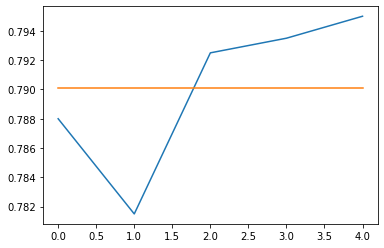

In [31]:
# 平均值決定了我們的全局分數，這意味著我們可以確信該模型的實時性能在這個數據集上就會出現。
import matplotlib.pyplot as plt

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

In [32]:
print(" Cross validation score : " , np.mean(test_scores))

 Cross validation score :  0.7901


## Hyperparameters - GridSearchCV
允許我們進行超參數搜索的工具稱為 GridSearchCV，它將為我們傳遞的每個可能的超參數重新運行模型訓練，在這種情況下，我們要求它嘗試每個值，它會使用訓練數據來選擇最佳值。GridSearchCV 構造函數需要做兩件事：
1. 我們想要探索的模型
2. 包含我們要測試的超參數值的字典

In [33]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 4 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

In [34]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [35]:
# We declared values for 4 hyperparameters and the respective values on which

param_grid = {
    'penalty' : ['l2'],
    'C' : [1.0 , 2.0 , 3.0],
    'max_iter' : [100 , 200 , 300 , 500],
    'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga']}

model = LogisticRegression()
grid_search = GridSearchCV(model , param_grid)   #GridSearchCV 接受兩個參數。第一個是要訓練的模型，第二個是參數網格。
grid_search.fit(Xtrain , Ytrain)

C:\Users\cti110016\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed 

C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergen

C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergen

C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\cti110016\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergen

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [100, 200, 300, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [36]:
grid_search.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [37]:
grid_search.score(Xtest , Ytest)

0.812